# Практическое задание 2

Практическое задание:

1) Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете MNIST с другими параметрами. Напишите в комментарии к уроку:
- Какого результата вы добились от нейросети?
- Что помогло вам улучшить её точность?   

➜ [к сравнению моделей](#models)    
➜ [к ответу](#answer1)

2) Поработайте с документацией Keras. Попробуйте найти полезные команды Keras, неразобранные на уроке.

➜ [к ответу](#answer2)

In [1]:
import mnist

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


Визуализируем данные

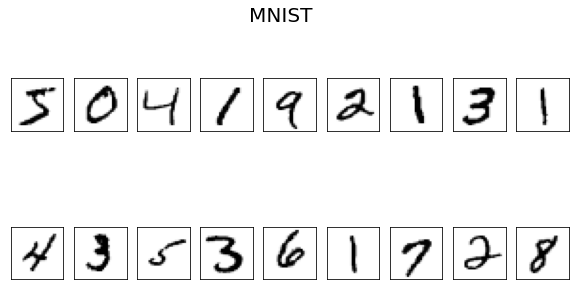

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 9, figsize=(10, 5))
fig.suptitle('MNIST', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(train_images[n], cmap='Greys')
    n += 1

In [5]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


# Создание модели

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [24]:
# альтернативная запись
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='sigmoid'),
])


# Компиляция модели

In [25]:
# создание keras модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение нейронной сети

In [10]:
from tensorflow.keras.utils import to_categorical

In [27]:
print(train_labels[:5])
to_categorical(train_labels[:5])

[5 0 4 1 9]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [28]:
%%time
model.fit(train_images, 
          to_categorical(train_labels), 
          epochs=5, 
          batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3608 - accuracy: 0.8921
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1820 - accuracy: 0.9446
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1414 - accuracy: 0.9564
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1195 - accuracy: 0.9628
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1062 - accuracy: 0.9670
CPU times: total: 1min 27s
Wall time: 1min 7s


# Оценка обученности нейронной сети

In [30]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 2s 7ms/step - loss: 0.1083 - accuracy: 0.9664


[0.10832690447568893, 0.9664000272750854]

# Сохранить и загрузить веса

In [31]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
model.load_weights('model.h5')

# Запуск нейронной сети для выполнения работы

In [32]:
import numpy as np 

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]


1/1 [==============================] - 0s 69ms/step
[7 2 1 0 4]
[7 2 1 0 4]


In [33]:
predictions

array([[4.2818904e-02, 2.7240841e-02, 5.8735561e-01, 9.8740011e-01,
        3.9632805e-04, 2.5327519e-01, 1.9242477e-06, 9.9995816e-01,
        1.7986308e-01, 9.0904540e-01],
       [1.9439639e-01, 9.5050061e-01, 9.9998713e-01, 8.9301604e-01,
        6.1014318e-05, 3.0099696e-02, 9.1766423e-01, 1.7259413e-03,
        5.1865077e-01, 1.3046175e-05],
       [5.3115672e-04, 9.9872428e-01, 3.3503607e-01, 8.8432364e-02,
        6.5438509e-01, 2.4368132e-02, 3.8391799e-03, 8.2584476e-01,
        8.7279117e-01, 1.5730971e-01],
       [9.9994993e-01, 1.4579681e-02, 3.9444125e-01, 7.2572738e-01,
        3.2054372e-02, 1.2047661e-02, 9.1959840e-01, 1.2609267e-01,
        5.5291075e-02, 4.8556009e-01],
       [4.0829951e-01, 1.0429544e-01, 4.1922122e-01, 2.8300840e-01,
        9.9997067e-01, 4.7850399e-03, 8.1455576e-01, 5.7808006e-01,
        2.7725199e-01, 9.8752856e-01]], dtype=float32)

## Сравнение моделей <a class="anchor" id="models"></a>

➜ [к ответу](#answer1)

### Model 2

In [13]:
model_2 = Sequential([
  Dense(100, activation='tanh', input_shape=(784,)),
  Dense(100, activation='tanh'),
  Dense(10, activation='sigmoid'),
])

In [14]:
model_2.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [15]:
%%time
model_2.fit(train_images, 
          to_categorical(train_labels), 
          epochs=8, 
          batch_size=32)

Epoch 1/8
1875/1875 [==============================] - 2s 912us/step - loss: 2.2297 - accuracy: 0.1912
Epoch 2/8
1875/1875 [==============================] - 2s 900us/step - loss: 1.9837 - accuracy: 0.4098
Epoch 3/8
1875/1875 [==============================] - 2s 904us/step - loss: 1.7681 - accuracy: 0.5458
Epoch 4/8
1875/1875 [==============================] - 2s 903us/step - loss: 1.5754 - accuracy: 0.6249
Epoch 5/8
1875/1875 [==============================] - 2s 912us/step - loss: 1.4116 - accuracy: 0.6744
Epoch 6/8
1875/1875 [==============================] - 2s 905us/step - loss: 1.2762 - accuracy: 0.7135
Epoch 7/8
1875/1875 [==============================] - 2s 908us/step - loss: 1.1642 - accuracy: 0.7424
Epoch 8/8
1875/1875 [==============================] - 2s 918us/step - loss: 1.0710 - accuracy: 0.7662
Wall time: 13.9 s


In [16]:
%%time
model_2.fit(train_images, 
          to_categorical(train_labels), 
          epochs=20, 
          batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 2s 929us/step - loss: 0.9929 - accuracy: 0.7839
Epoch 2/20
1875/1875 [==============================] - 2s 929us/step - loss: 0.9269 - accuracy: 0.7986
Epoch 3/20
1875/1875 [==============================] - 2s 921us/step - loss: 0.8703 - accuracy: 0.8101
Epoch 4/20
1875/1875 [==============================] - 2s 915us/step - loss: 0.8216 - accuracy: 0.8202
Epoch 5/20
1875/1875 [==============================] - 2s 921us/step - loss: 0.7795 - accuracy: 0.8283
Epoch 6/20
1875/1875 [==============================] - 2s 925us/step - loss: 0.7425 - accuracy: 0.8345
Epoch 7/20
1875/1875 [==============================] - 2s 942us/step - loss: 0.7100 - accuracy: 0.8396
Epoch 8/20
1875/1875 [==============================] - 2s 949us/step - loss: 0.6812 - accuracy: 0.8444
Epoch 9/20
1875/1875 [==============================] - 2s 940us/step - loss: 0.6555 - accuracy: 0.8486
Epoch 10/20
1875/1875 [==============================] - 2s 940u

### Model 3

In [17]:
model_3 = Sequential([
  Dense(100, activation='softmax', input_shape=(784,)),
  Dense(100, activation='softmax'),
  Dense(10, activation='sigmoid'),
])

model_3.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

In [19]:
%%time
model_3.fit(train_images, 
          to_categorical(train_labels), 
          epochs=8, 
          batch_size=32)

Epoch 1/8
1875/1875 [==============================] - 2s 931us/step - loss: 2.3022 - accuracy: 0.1093
Epoch 2/8
1875/1875 [==============================] - 2s 917us/step - loss: 2.3020 - accuracy: 0.1124
Epoch 3/8
1875/1875 [==============================] - 2s 922us/step - loss: 2.3019 - accuracy: 0.1124
Epoch 4/8
1875/1875 [==============================] - 2s 922us/step - loss: 2.3019 - accuracy: 0.1124
Epoch 5/8
1875/1875 [==============================] - 2s 923us/step - loss: 2.3018 - accuracy: 0.1124
Epoch 6/8
1875/1875 [==============================] - 2s 925us/step - loss: 2.3017 - accuracy: 0.1124
Epoch 7/8
1875/1875 [==============================] - 2s 924us/step - loss: 2.3017 - accuracy: 0.1124
Epoch 8/8
1875/1875 [==============================] - 2s 925us/step - loss: 2.3017 - accuracy: 0.1124
Wall time: 14.2 s


### Model 4

In [21]:
model_4 = Sequential([
  Dense(64, activation='exponential', input_shape=(784,)),
  Dense(64, activation='exponential'),
  Dense(10, activation='sigmoid'),
])

model_4.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

In [22]:
%%time
model_4.fit(train_images, 
          to_categorical(train_labels), 
          epochs=8, 
          batch_size=32)

Epoch 1/8
1875/1875 [==============================] - 2s 811us/step - loss: 0.9882 - accuracy: 0.7141
Epoch 2/8
1875/1875 [==============================] - 1s 790us/step - loss: 0.5060 - accuracy: 0.8546
Epoch 3/8
1875/1875 [==============================] - 1s 787us/step - loss: 0.4281 - accuracy: 0.8782
Epoch 4/8
1875/1875 [==============================] - 1s 798us/step - loss: 0.3871 - accuracy: 0.8901
Epoch 5/8
1875/1875 [==============================] - 1s 787us/step - loss: 0.3592 - accuracy: 0.8973
Epoch 6/8
1875/1875 [==============================] - 1s 788us/step - loss: 0.3392 - accuracy: 0.9035
Epoch 7/8
1875/1875 [==============================] - 1s 787us/step - loss: 0.3234 - accuracy: 0.9079
Epoch 8/8
1875/1875 [==============================] - 1s 799us/step - loss: 0.3108 - accuracy: 0.9114
Wall time: 12.2 s


### Model 5.1

In [27]:
model_6 = Sequential([
  Dense(100, activation='selu', input_shape=(784,)),
  Dense(100, activation='selu'),
  Dense(10, activation='sigmoid'),
])

model_6.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [28]:
%%time
model_6.fit(train_images, 
          to_categorical(train_labels), 
          epochs=8, 
          batch_size=32)

Epoch 1/8
1875/1875 [==============================] - 2s 959us/step - loss: 0.3808 - accuracy: 0.8885
Epoch 2/8
1875/1875 [==============================] - 2s 934us/step - loss: 0.2295 - accuracy: 0.9320
Epoch 3/8
1875/1875 [==============================] - 2s 932us/step - loss: 0.1704 - accuracy: 0.9498
Epoch 4/8
1875/1875 [==============================] - 2s 937us/step - loss: 0.1351 - accuracy: 0.9597
Epoch 5/8
1875/1875 [==============================] - 2s 948us/step - loss: 0.1119 - accuracy: 0.9665
Epoch 6/8
1875/1875 [==============================] - 2s 935us/step - loss: 0.0963 - accuracy: 0.9706
Epoch 7/8
1875/1875 [==============================] - 2s 938us/step - loss: 0.0847 - accuracy: 0.9741
Epoch 8/8
1875/1875 [==============================] - 2s 939us/step - loss: 0.0752 - accuracy: 0.9779
Wall time: 14.4 s


### Model 5.2

In [29]:
model_5_2 = Sequential([
  Dense(100, activation='selu', input_shape=(784,)),
  Dense(100, activation='selu'),  
  Dense(100, activation='selu'),
  Dense(10, activation='sigmoid'),
])

model_5_2.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [30]:
%%time
model_5_2.fit(train_images, 
          to_categorical(train_labels), 
          epochs=10, 
          batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3507 - accuracy: 0.8952
Epoch 2/10
1875/1875 [==============================] - 2s 998us/step - loss: 0.1923 - accuracy: 0.9421
Epoch 3/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.1374 - accuracy: 0.9580
Epoch 4/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.1098 - accuracy: 0.9664
Epoch 5/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.0920 - accuracy: 0.9716
Epoch 6/10
1875/1875 [==============================] - 2s 989us/step - loss: 0.0794 - accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 2s 995us/step - loss: 0.0698 - accuracy: 0.9783
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0617 - accuracy: 0.9813
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0549 - accuracy: 0.9831
Epoch 10/10
1875/1875 [==============================] - 2s 999us/step

In [31]:
model_5_2.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 786us/step - loss: 0.0902 - accuracy: 0.9731


[0.09016887098550797, 0.9731000065803528]

In [36]:
model_5_3 = Sequential([
  Dense(100, activation='selu', input_shape=(784,)),
  Dense(100, activation='selu'),  
  Dense(10, activation='sigmoid'),
])

model_5_3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [37]:
%%time
model_5_3.fit(train_images, 
          to_categorical(train_labels), 
          epochs=10, 
          batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 2s 920us/step - loss: 0.3218 - accuracy: 0.9017
Epoch 2/10
1875/1875 [==============================] - 2s 903us/step - loss: 0.1629 - accuracy: 0.9511
Epoch 3/10
1875/1875 [==============================] - 2s 902us/step - loss: 0.1212 - accuracy: 0.9624
Epoch 4/10
1875/1875 [==============================] - 2s 938us/step - loss: 0.1022 - accuracy: 0.9678
Epoch 5/10
1875/1875 [==============================] - 2s 933us/step - loss: 0.0872 - accuracy: 0.9719
Epoch 6/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.0745 - accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 2s 938us/step - loss: 0.0682 - accuracy: 0.9779
Epoch 8/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.0604 - accuracy: 0.9798
Epoch 9/10
1875/1875 [==============================] - 2s 938us/step - loss: 0.0533 - accuracy: 0.9825
Epoch 10/10
1875/1875 [==============================] - 2s 921u

**Ответ<a class="anchor" id="answer1"></a>**

In [38]:
#результат
model_5_3.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 726us/step - loss: 0.0978 - accuracy: 0.9723


[0.09782101213932037, 0.9722999930381775]

Обучив модели с разными параметрами, удалось как улучшить результат, так и, наоборот, ухудшить. Очевидно, что не все функции активации подходят для этой задачи (функция softmax абсолютно не подходит, функция tanh работает так себе - даже увеличив число эпох в общей сложности до 28 не удалось добится того же результата, что и у модели с relu).     
Однозначно можно утверждать, что среди параметров улучшающих модель - число нейронов, число эпох. Увеличение числа слоев слабо повлияло на результат

**Ответ на задание 2<a class="anchor" id="answer2"></a>**

**Сохранение конфигурации модели:**

- Сериализация модели в формат JSON   
json_string = model.to_json()

- осстановление модели (заново инициализированной) из JSON   
model = tensorflow.keras.models.model_from_json(json_string)

**Сохранение всей модели в файл HDF5**

- model.save('my_model.h5')

- Пересоздание в точности модели включая веса и оптимизатор   
model = tensorflow.keras.models.load_model('my_model.h5')

**Колбеки**

- Сохранение контрольных точек модели за регулярные интервалы   
tensorflow.keras.callbacks.ModelCheckpoint 
- Динамичное изменение шага обучения    
tensorflow.keras.callbacks.LearningRateScheduler 
- Остановка обучения в том случае когда результат при валидации перестает улучшаться   
tensorflow.keras.callbacks.EarlyStopping 
- Мониторинг поведения модели с помощью TensorBoard   
tensorflow.keras.callbacks.TensorBoard 

In [39]:
# callbacks = [
#   # Остановить обучение если `val_loss` перестанет улучшаться в течение 2 эпох
#   tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
#   # Записать логи TensorBoard в каталог `./logs` directory
#   tf.keras.callbacks.TensorBoard(log_dir='./logs')
# ]
# model.fit(data, labels, batch_size=32, epochs=5, callbacks=callbacks,
#           validation_data=(val_data, val_labels))